# Momentum

2.4.3 shows the following "naive" momentum code

```
past_velocity = 0.
momentum = 0.1
while loss > 0.01:
    w, loss, gradient = get_current_parameters()
    velocity = past_velocity * momentum - learning_rate * gradient
    w = w + momentum * velocity - learning_rate * gradient
    past_velocity = velocity
    update_parameter(w)
```

what is going on? looks like we're double counting `gradient` when updating `w` ...

I used [Jason Brownlee: Gradient Descent With Momentum from Scratch](https://machinelearningmastery.com/gradient-descent-with-momentum-from-scratch/) as a start point for this notebook

In [1]:
from numpy import asarray
from numpy import arange
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot

In [2]:
# objective function
def objective(x):
    return x**2.0
 
# derivative of objective function
def derivative(x):
    return x * 2.0 

Samll change to the Jason Brownlee code; when we "take a step" &darr; we use an `optimizer` - so we can run exactly the same `gradient_descent` code with different momentum implementations

In [3]:
# gradient descent algorithm
def gradient_descent(objective, derivative, bounds, n_iter, optimizer):
    # track all solutions
    solutions, scores = list(), list()
    # generate an initial point
    solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    # run the gradient descent
    for i in range(n_iter):
        # calculate gradient
        gradient = derivative(solution)
        # take a step
        solution = optimizer.step(solution, gradient)
        # evaluate candidate point
        solution_eval = objective(solution)
        # store solution
        solutions.append(solution)
        scores.append(solution_eval)
        # report progress
        print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
    return [solutions, scores]

In [4]:
def learn(optimizer):
    # seed the pseudo random number generator
    seed(4)
    # define range for input
    bounds = asarray([[-1.0, 1.0]])
    # define the total iterations
    n_iter = 30
    # perform the gradient descent search
    solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, optimizer)
    # sample input range uniformly at 0.1 increments
    inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
    # compute targets
    results = objective(inputs)
    # create a line plot of input vs result
    pyplot.plot(inputs, results)
    # plot the solutions found
    pyplot.plot(solutions, scores, '.-', color='red')
    # show the plot
    pyplot.show()

# Optimizers

In [5]:
class Opimizer:
    "Gradient descent"
    def __init__(self, step_size=0.1):
        self.step_size = step_size
        
    def step(self, solution, gradient):
        return solution - self.step_size * gradient

In [6]:
class OptimizerWithBrowleeMomentum:
    "Gradient descent with momentum as Jason Brownlee did it"
    def __init__(self, step_size=0.1, momentum=0.3):
        self.step_size = step_size
        self.momentum = momentum
        self.change = 0.0
        
    def step(self, solution, gradient):
        new_change = self.step_size * gradient + self.momentum * self.change
        solution = solution - new_change
        self.change = new_change
        return solution

In [7]:
class OptimizerWithFastaiMomentum:
    "Gradient descent with momentum as Fastai do it"
    # https://docs.fast.ai/optimizer.html
    def __init__(self, step_size=0.1, momentum=0.3, dampening=False):
        self.step_size = step_size
        self.momentum = momentum                     # fastai call this mom
        self.damp = 1 - momentum if dampening else 1
        self.change = 0.0                            # fastai call this grad_avg
        
    def step(self, solution, gradient):
        # https://github.com/fastai/fastai/blob/master/fastai/optimizer.py#L118
        # grad_avg.mul_(mom).add_(p.grad.data, alpha=damp)
        self.change = (self.change * self.momentum) + (gradient * self.damp)
        # https://github.com/fastai/fastai/blob/master/fastai/optimizer.py#L137
        # p.data.add_(grad_avg, alpha=-lr)
        solution = solution + (self.change * -self.step_size)
        return solution

In [8]:
class OptimizerWithNaiveMomentum:
    "Gradient descent with momentum as shown on 2.4.3 p55"
    def __init__(self, step_size=0.1, momentum=0.3):
        self.step_size = step_size # learning_rate
        self.momentum = momentum
        self.change = 0.0          # past_velocity
        
    def step(self, solution, gradient):
        new_change = self.change * self.momentum - self.step_size * gradient
        solution = solution + self.momentum * new_change - self.step_size * gradient
        self.change = new_change
        return solution

# Gradient descent without momentum

Note: we can "find" the solution in one step if we use a step size (learning rate) of .5 ... but that's not the point of this noteboook (o:

>0 f([0.74724774]) = 0.55838
>1 f([0.59779819]) = 0.35736
>2 f([0.47823856]) = 0.22871
>3 f([0.38259084]) = 0.14638
>4 f([0.30607268]) = 0.09368
>5 f([0.24485814]) = 0.05996
>6 f([0.19588651]) = 0.03837
>7 f([0.15670921]) = 0.02456
>8 f([0.12536737]) = 0.01572
>9 f([0.10029389]) = 0.01006
>10 f([0.08023512]) = 0.00644
>11 f([0.06418809]) = 0.00412
>12 f([0.05135047]) = 0.00264
>13 f([0.04108038]) = 0.00169
>14 f([0.0328643]) = 0.00108
>15 f([0.02629144]) = 0.00069
>16 f([0.02103315]) = 0.00044
>17 f([0.01682652]) = 0.00028
>18 f([0.01346122]) = 0.00018
>19 f([0.01076897]) = 0.00012
>20 f([0.00861518]) = 0.00007
>21 f([0.00689214]) = 0.00005
>22 f([0.00551372]) = 0.00003
>23 f([0.00441097]) = 0.00002
>24 f([0.00352878]) = 0.00001
>25 f([0.00282302]) = 0.00001
>26 f([0.00225842]) = 0.00001
>27 f([0.00180673]) = 0.00000
>28 f([0.00144539]) = 0.00000
>29 f([0.00115631]) = 0.00000


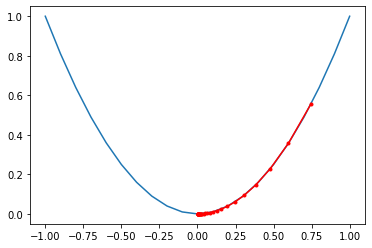

In [16]:
learn(Opimizer())

# With "Brownlee" momentum &darr;

>0 f([0.74724774]) = 0.55838
>1 f([0.54175461]) = 0.29350
>2 f([0.37175575]) = 0.13820
>3 f([0.24640494]) = 0.06072
>4 f([0.15951871]) = 0.02545
>5 f([0.1015491]) = 0.01031
>6 f([0.0638484]) = 0.00408
>7 f([0.03976851]) = 0.00158
>8 f([0.02459084]) = 0.00060
>9 f([0.01511937]) = 0.00023
>10 f([0.00925406]) = 0.00009
>11 f([0.00564365]) = 0.00003
>12 f([0.0034318]) = 0.00001
>13 f([0.00208188]) = 0.00000
>14 f([0.00126053]) = 0.00000
>15 f([0.00076202]) = 0.00000
>16 f([0.00046006]) = 0.00000
>17 f([0.00027746]) = 0.00000
>18 f([0.00016719]) = 0.00000
>19 f([0.00010067]) = 0.00000
>20 f([6.05804744e-05]) = 0.00000
>21 f([3.64373635e-05]) = 0.00000
>22 f([2.19069576e-05]) = 0.00000
>23 f([1.31664443e-05]) = 0.00000
>24 f([7.91100141e-06]) = 0.00000
>25 f([4.75216828e-06]) = 0.00000
>26 f([2.85408468e-06]) = 0.00000
>27 f([1.71384267e-06]) = 0.00000
>28 f([1.02900153e-06]) = 0.00000
>29 f([6.17748881e-07]) = 0.00000


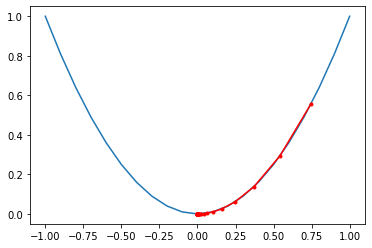

In [10]:
learn(OptimizerWithBrowleeMomentum())

# With "Fastai" momentum &darr;

`OptimizerWithFastaiMomentum(dampening=False)` does the same as `OptimizerWithBrowleeMomentum()`

>0 f([0.80329132]) = 0.64528
>1 f([0.65160003]) = 0.42458
>2 f([0.51486864]) = 0.26509
>3 f([0.40176761]) = 0.16142
>4 f([0.31158984]) = 0.09709
>5 f([0.24091393]) = 0.05804
>6 f([0.18598321]) = 0.03459
>7 f([0.14346634]) = 0.02058
>8 f([0.11062599]) = 0.01224
>9 f([0.08528625]) = 0.00727
>10 f([0.06574425]) = 0.00432
>11 f([0.05067746]) = 0.00257
>12 f([0.03906257]) = 0.00153
>13 f([0.03010935]) = 0.00091
>14 f([0.02320807]) = 0.00054
>15 f([0.01788856]) = 0.00032
>16 f([0.01378831]) = 0.00019
>17 f([0.01062787]) = 0.00011
>18 f([0.00819184]) = 0.00007
>19 f([0.00631417]) = 0.00004
>20 f([0.00486688]) = 0.00002
>21 f([0.00375134]) = 0.00001
>22 f([0.00289148]) = 0.00001
>23 f([0.00222872]) = 0.00000
>24 f([0.00171787]) = 0.00000
>25 f([0.00132411]) = 0.00000
>26 f([0.00102061]) = 0.00000
>27 f([0.00078667]) = 0.00000
>28 f([0.00060636]) = 0.00000
>29 f([0.00046737]) = 0.00000


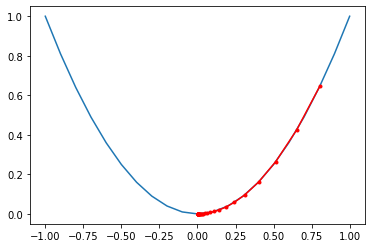

In [11]:
learn(OptimizerWithFastaiMomentum(dampening=True))

# With "naive" momentum &darr;

>0 f([0.69120416]) = 0.47776
>1 f([0.49467801]) = 0.24471
>2 f([0.34857613]) = 0.12151
>3 f([0.24379645]) = 0.05944
>4 f([0.16989004]) = 0.02886
>5 f([0.11817449]) = 0.01397
>6 f([0.08212786]) = 0.00674
>7 f([0.0570511]) = 0.00325
>8 f([0.03962246]) = 0.00157
>9 f([0.02751509]) = 0.00076
>10 f([0.0191063]) = 0.00037
>11 f([0.01326693]) = 0.00018
>12 f([0.0092121]) = 0.00008
>13 f([0.00639652]) = 0.00004
>14 f([0.00444148]) = 0.00002
>15 f([0.00308397]) = 0.00001
>16 f([0.00214137]) = 0.00000
>17 f([0.00148688]) = 0.00000
>18 f([0.00103242]) = 0.00000
>19 f([0.00071687]) = 0.00000
>20 f([0.00049776]) = 0.00000
>21 f([0.00034562]) = 0.00000
>22 f([0.00023999]) = 0.00000
>23 f([0.00016664]) = 0.00000
>24 f([0.0001157]) = 0.00000
>25 f([8.03401363e-05]) = 0.00000
>26 f([5.57846523e-05]) = 0.00000
>27 f([3.87344057e-05]) = 0.00000
>28 f([2.68954654e-05]) = 0.00000
>29 f([1.86750266e-05]) = 0.00000


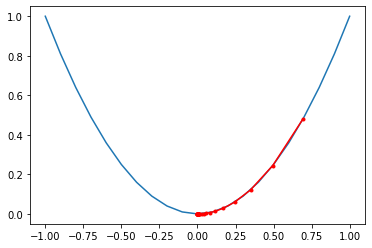

In [12]:
learn(OptimizerWithNaiveMomentum())

# What have we learned so far?

It don't think it makes sense to read too much into the different momentum implementations using this problem - because our objective function is smooth. 

Having said that ... we can see that
- "Brownlee" momentum converges fastest
- momentum with dampening takes the longest to converge - but is still faster than no momentum
- "Naive" momentum takes just a little longer than "Brownlee"

TODO: See if we can do something similar with a more complicated problem with a bumpy loss surface [Visualizing the Loss Landscape of Neural Nets](https://proceedings.neurips.cc/paper/2018/file/a41b3bb3e6b050b6c9067c67f663b915-Paper.pdf).